# Final Project Question 4

*Importing necessary libraries*

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from IPython.display import display
import sqlite3
%load_ext sql
%sql sqlite:///emprs.db
conn = sqlite3.connect('emprs.db')

Reading data into df and into slq tables.

In [2]:
dataset1 = "./data/emprs.csv"
dataset2 = "./data/nuts2.xlsx"

In [3]:
df_test1 = pd.read_csv(dataset1)

In [4]:
df_test2 = pd.read_excel(dataset2)

In [5]:
%%sql
drop table ta_raw;
drop table ta_nuts2_name;

 * sqlite:///emprs.db
Done.
Done.


[]

In [6]:
df_test1.to_sql("ta_raw", conn)
df_test2.to_sql("ta_nuts2_name", conn)

271

Only if you want to rerun the project.

In [7]:
%%sql
drop table ta_emprate_nuts2;
drop table ta_emprate_country;

 * sqlite:///emprs.db
Done.
Done.


[]

Creating tables and removing columns DATAFLOW, LASTUPDATE and freq

In [8]:
%%sql
create table ta_emprate_nuts2 as select unit, wstatus, citizen, sex, age, geo, TIME_PERIOD, OBS_VALUE from ta_raw;
create table ta_emprate_country as select unit, wstatus, citizen, sex, age, geo, TIME_PERIOD, OBS_VALUE from ta_raw;

 * sqlite:///emprs.db
Done.
Done.


[]

Further data processing/cleaning and preparation

In [9]:
%%sql

alter table ta_emprate_nuts2
add column nuts2_name TEXT;

 * sqlite:///emprs.db
Done.


[]

In [10]:
%%sql
alter table ta_nuts2_name
rename column "NUTS Code" to "nuts_code";
alter table ta_nuts2_name
rename column "NUTS label" to "nuts_label";

 * sqlite:///emprs.db
Done.
Done.


[]

In [11]:
%%sql

select * from ta_nuts2_name limit 5;

 * sqlite:///emprs.db
Done.


index,Country code,nuts_code,nuts_label,NUTS level,Country order
0,BE,BE10,Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest,2,1
1,BE,BE21,Prov. Antwerpen,2,1
2,BE,BE22,Prov. Limburg (BE),2,1
3,BE,BE23,Prov. Oost-Vlaanderen,2,1
4,BE,BE24,Prov. Vlaams-Brabant,2,1


Deleting unwanted entries

In [12]:
%%sql
delete from ta_emprate_country
where length(geo) > 2;
delete from ta_emprate_country 
where citizen is not 'TOTAL';
delete from ta_emprate_country 
where age is not 'Y15-64';
delete from ta_emprate_nuts2
where length(geo) < 3;
delete from ta_emprate_nuts2 
where citizen is not 'TOTAL';
delete from ta_emprate_nuts2 
where age is not 'Y15-64';

 * sqlite:///emprs.db
4497741 rows affected.
318830 rows affected.
61938 rows affected.
393155 rows affected.
3561741 rows affected.
779994 rows affected.


[]

Adding NUTS2 region name

In [13]:
%%sql

UPDATE ta_emprate_nuts2
SET nuts2_name = (
    SELECT nuts_label
    FROM ta_nuts2_name
    WHERE ta_nuts2_name.nuts_code = ta_emprate_nuts2.geo
)
WHERE EXISTS (
    SELECT 1
    FROM ta_nuts2_name
    WHERE ta_nuts2_name.nuts_code = ta_emprate_nuts2.geo
);


 * sqlite:///emprs.db
83770 rows affected.


[]

In [14]:
%%sql

delete from ta_emprate_nuts2 
where nuts2_name is NULL;

 * sqlite:///emprs.db
72236 rows affected.


[]

In [15]:
%%sql

select * from ta_emprate_nuts2
limit 10
;

 * sqlite:///emprs.db
Done.


unit,wstatus,citizen,sex,age,geo,TIME_PERIOD,OBS_VALUE,nuts2_name
THS_PER,ACT,TOTAL,F,Y15-64,AT11,1999,54.8,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2000,55.7,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2001,55.3,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2002,55.6,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2003,57.2,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2004,56.7,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2005,59.5,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2006,60.1,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2007,61.1,Burgenland
THS_PER,ACT,TOTAL,F,Y15-64,AT11,2008,61.8,Burgenland


In [16]:
%%sql
select * from ta_emprate_country
limit 10;

 * sqlite:///emprs.db
Done.


unit,wstatus,citizen,sex,age,geo,TIME_PERIOD,OBS_VALUE
THS_PER,ACT,TOTAL,F,Y15-64,AT,1999,1681.1
THS_PER,ACT,TOTAL,F,Y15-64,AT,2000,1686.5
THS_PER,ACT,TOTAL,F,Y15-64,AT,2001,1689.9
THS_PER,ACT,TOTAL,F,Y15-64,AT,2002,1723.6
THS_PER,ACT,TOTAL,F,Y15-64,AT,2003,1747.7
THS_PER,ACT,TOTAL,F,Y15-64,AT,2004,1733.7
THS_PER,ACT,TOTAL,F,Y15-64,AT,2005,1794.8
THS_PER,ACT,TOTAL,F,Y15-64,AT,2006,1828.2
THS_PER,ACT,TOTAL,F,Y15-64,AT,2007,1863.0
THS_PER,ACT,TOTAL,F,Y15-64,AT,2008,1891.2


Creating a table for each working status.

In [17]:
%%sql
create table ta_emprate_nuts2_act as
select *
from ta_emprate_nuts2
where wstatus = 'ACT';

create table ta_emprate_nuts2_emp AS
select *
from ta_emprate_nuts2
where wstatus = 'EMP';

create table ta_emprate_nuts2_inac as
select *
from ta_emprate_nuts2
where wstatus = 'INAC';

create table ta_emprate_nuts2_pop as
select *
from ta_emprate_nuts2
where wstatus = 'POP';

creat table ta_emprate_nuts2_une as
select *
from ta_emprate_nuts2
where wstatus = 'UNE';

create table ta_emprate_nuts2_unk as
select *
from ta_emprate_nuts2
where wstatus = 'UNK';

 * sqlite:///emprs.db
(sqlite3.OperationalError) table ta_emprate_nuts2_act already exists
[SQL: create table ta_emprate_nuts2_act as
select *
from ta_emprate_nuts2
where wstatus = 'ACT';]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [18]:
df_emprate_nuts2 = pd.read_sql_query("SELECT * FROM ta_emprate_nuts2", conn)

Calculation the employment rate per year, sex and region

In [19]:
emp_data = df_emprate_nuts2[df_emprate_nuts2['wstatus'] == 'EMP']
pop_data = df_emprate_nuts2[df_emprate_nuts2['wstatus'] == 'POP']
#renaming columns 
emp_data = emp_data.rename(columns={"OBS_VALUE": "EMP_VALUE"})
pop_data = pop_data.rename(columns={"OBS_VALUE": "POP_VALUE"})

merged_data = pd.merge(emp_data, pop_data, on=["TIME_PERIOD", "geo", "sex", "nuts2_name"])

merged_data["employment_rate"] = (merged_data["EMP_VALUE"] / merged_data["POP_VALUE"]) * 100

result_df = merged_data[["TIME_PERIOD", "geo", "nuts2_name", "sex", "employment_rate"]]


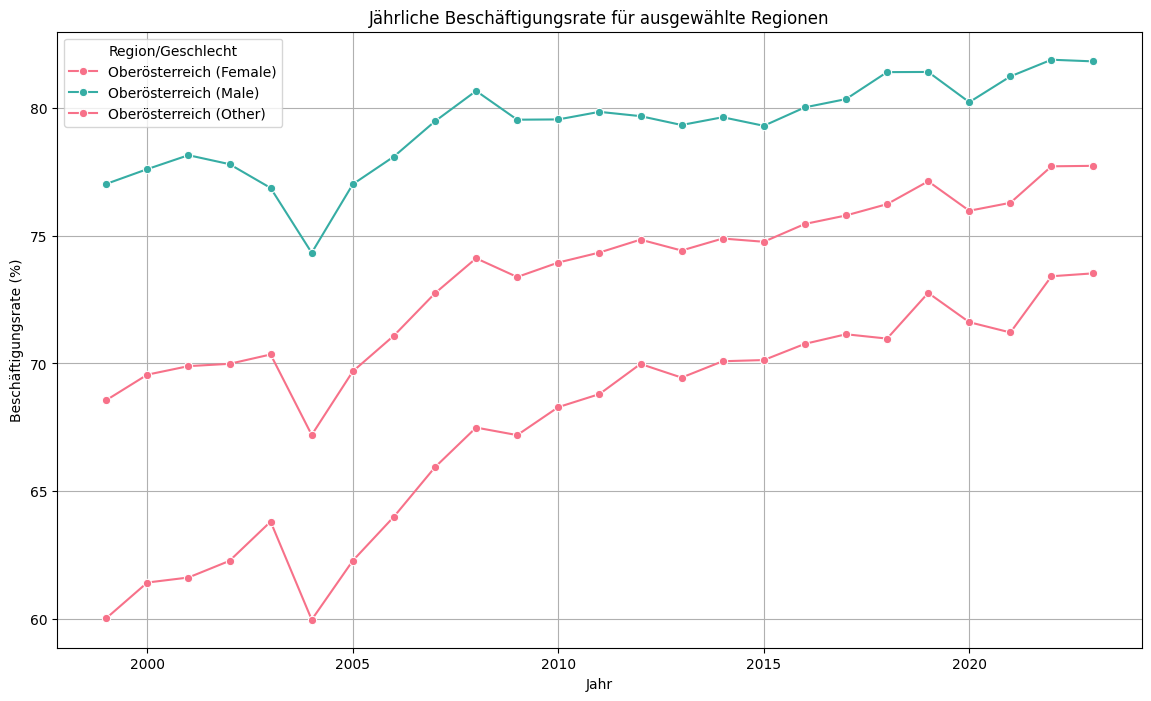

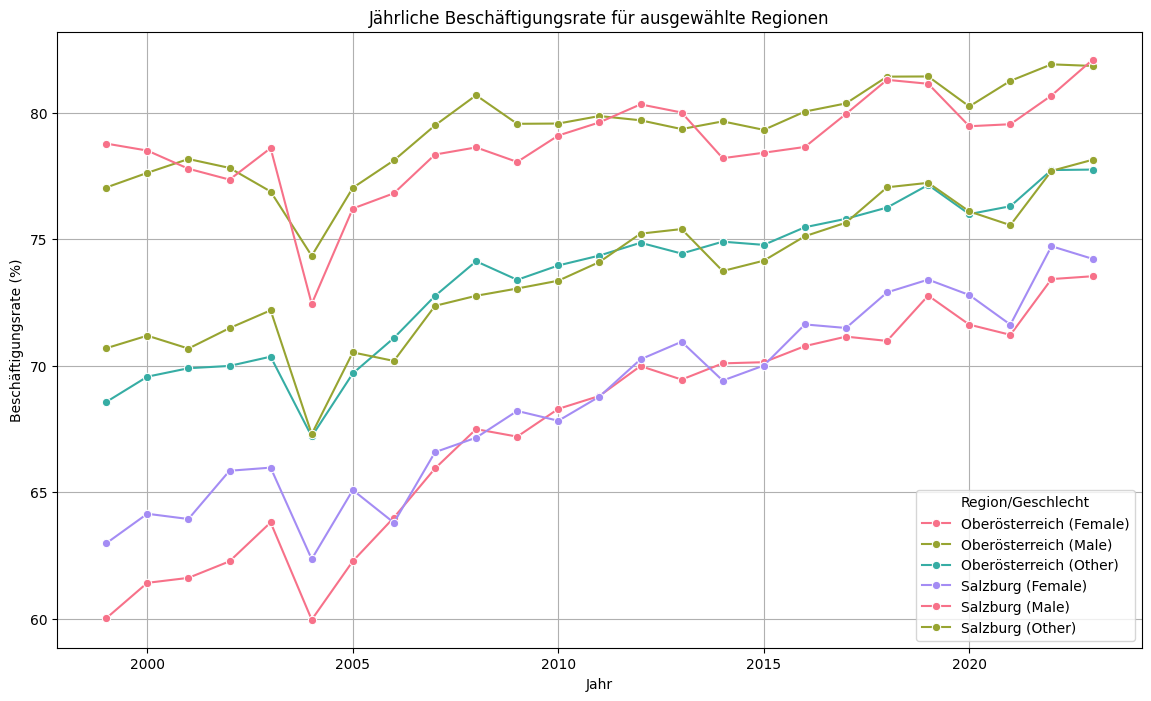

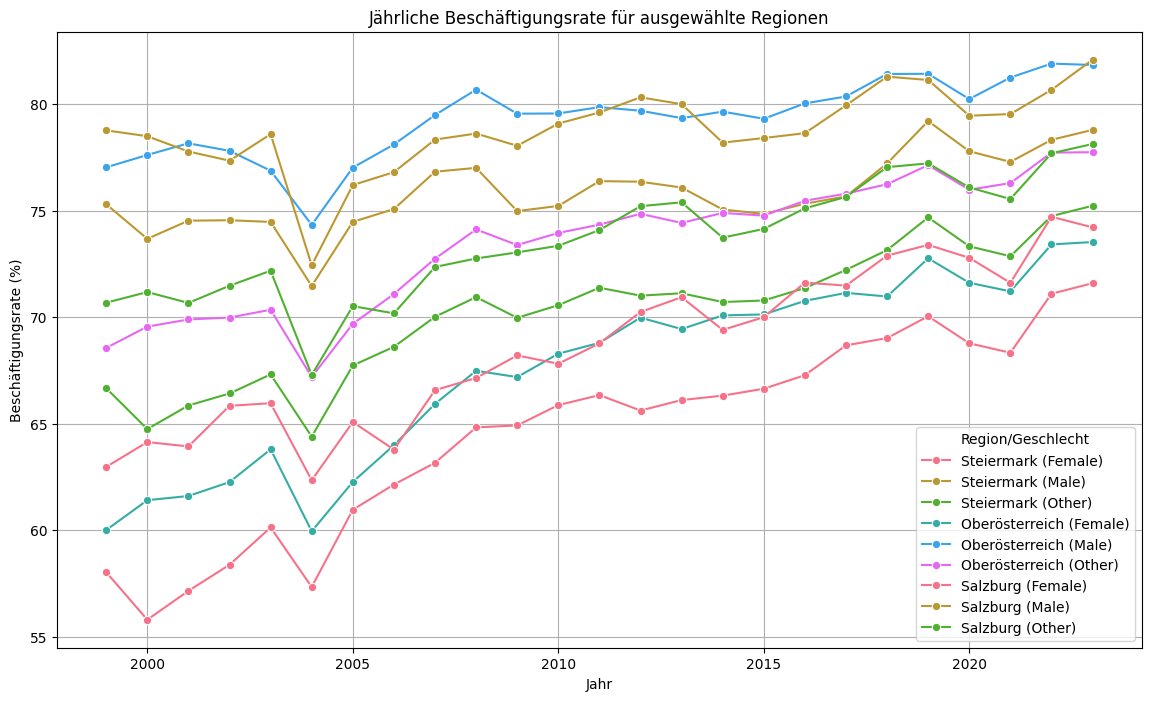

In [23]:
def plot_employment_rate(selected_regions):
    fig, ax = plt.subplots(figsize=(14, 8))
    num_lines = len(selected_regions) * 2  # Account for both sexes
    colors = sns.color_palette("husl", num_lines)
    color_idx = 0
    for region in selected_regions:
        filtered_df = result_df[result_df['nuts2_name'] == region]
        for sex in filtered_df['sex'].unique():
            sex_filtered_df = filtered_df[filtered_df['sex'] == sex]
            sns.lineplot(
                data=sex_filtered_df,
                x="TIME_PERIOD",
                y="employment_rate",
                color=colors[color_idx % num_lines],
                marker='o',
                label=f"{region} ({'Female' if sex == 'F' else 'Male' if sex == 'M' else 'Other'})",
                ax=ax
            )
            color_idx += 1
    ax.set_title("Jährliche Beschäftigungsrate für ausgewählte Regionen")
    ax.set_xlabel("Jahr")
    ax.set_ylabel("Beschäftigungsrate (%)")
    ax.legend(title="Region/Geschlecht")
    ax.grid(True)
    return fig

def on_select(event):
    selected_regions = [region_listbox.get(i) for i in region_listbox.curselection()]
    fig = plot_employment_rate(selected_regions)
    
    #claer the old plot
    for widget in plot_frame.winfo_children():
        widget.destroy()
    
    #display the new plot
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

#create Tkinter GUI
root = tk.Tk()
root.title("Beschäftigungsrate nach Region und Geschlecht")

#create frames
selection_frame = tk.Frame(root)
selection_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

plot_frame = tk.Frame(root)
plot_frame.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

#create Listbox for multiple selection
region_listbox = tk.Listbox(selection_frame, selectmode=tk.MULTIPLE)
for region in result_df['nuts2_name'].unique():
    region_listbox.insert(tk.END, region)
region_listbox.pack(padx=10, pady=10)
region_listbox.bind("<<ListboxSelect>>", on_select)

#start the GUI
root.mainloop()

In [21]:
df_emprate_country = pd.read_sql_query("SELECT * FROM ta_emprate_country", conn)